In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/hackathon/hackathon')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from google.colab import files

In [4]:
call_duration_df = pd.read_csv('updated_file_with_call_duration.csv')
sentiment_df = pd.read_csv('customer sentiment.csv')

In [5]:
print(call_duration_df.head())
print(sentiment_df.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  
0  \n\nAgent: Thank you for calling United Airlin...           38.0  
1  \n\nAgent: Thank you for calling United Airlin...           15.0  
2  \n\nAgent: Thank you for calling United Airlin...           27.0  
3  \n\nAgent: Thank you for calling United Airlin...

In [7]:
merged_df = pd.merge(call_duration_df, sentiment_df, on='call_id')
print(merged_df.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...           38.0   
1  \n\nAgent: Thank you for calling United Airlin...           15.0   
2  \n\nAgent: Thank you for calling United Airlin...           27.0   
3  \n\nAgent: Thank you for calling 

In [8]:
correlation = call_duration_df['call_duration'].corr(sentiment_df['average_sentiment'])

In [9]:
print(f'Correlation between call_duration and average_sentiment: {correlation}')

Correlation between call_duration and average_sentiment: -0.06737233676517697


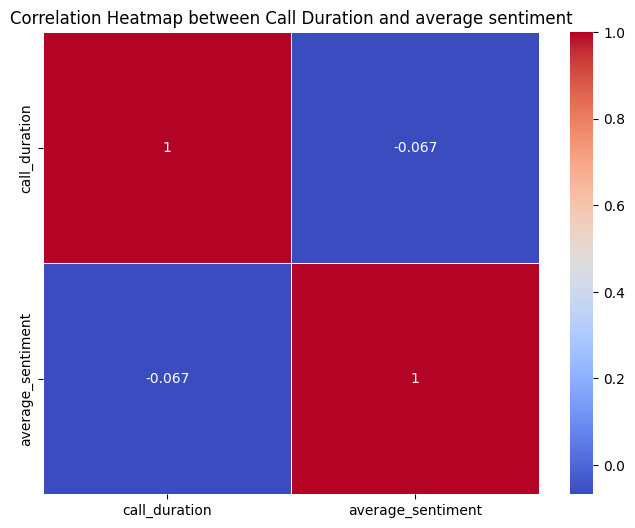

In [11]:
correlation_matrix = merged_df[['call_duration', 'average_sentiment']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Call Duration and average sentiment')
plt.show()